#### Question 1- 
1. Explain the concept of batch normailzation in the context of Artificial Nueral Networks.

- Batch normalization in Artificial Neural Networks is a technique that normalizes the outputs of intermediate layers during training. 
- It helps stabilize and speed up training by reducing internal covariate shift, ensuring each layer's input has a consistent mean and variance.

2. Describe the benefits of batch normalization during training.

- It helps stabilize and accelerate the learning process by reducing internal covariate shift, making gradients more consistent. 
- This enables the use of higher learning rates, prevents vanishing/exploding gradients, and regularizes the model, leading to faster convergence and improved generalization performance.

3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

- Batch normalization works by normalizing the outputs of a layer over mini-batches during training. 
- It calculates the mean and variance of each feature and scales/shifts the outputs using learnable parameters. 
- This stabilizes training, making gradients more consistent, and enables higher learning rates for faster convergence

#### Question 2-

1. Choose a dataset of your choice(eg., MNIST, CIFAR-10) and preprocess it using ANN.

In [3]:
import tensorflow as tf

2023-08-26 13:48:23.533960: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 13:48:23.606912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 13:48:23.608578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 13:48:24.940747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [5]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
# Scaling the dataset
X_valid,X_train=X_train_full[:5000]/255,X_train_full[5000:]/255
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

##Scaling the testing dataset also
X_test=X_test/255

2.  Implementation a simple feedforward nueral network using any deep learning framework/lobrary(e.g., TensorFlow, Pytorch).
#### Creating layers of ANN

In [7]:
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization

In [9]:
model_without_BN=tf.keras.models.Sequential()
model_without_BN.add(Flatten(input_shape=[28,28],name="input_layer"))
model_without_BN.add(Dense(200,activation='relu',name="hidden_layer1"))
model_without_BN.add(Dense(100,activation='relu',name="hidden_layer2"))
model_without_BN.add(Dense(10,activation="softmax",name="output_layer"))

In [10]:
model_without_BN.compile(loss="sparse_categorical_crossentropy",
                         optimizer='adam',
                         metrics=['accuracy'])

3. Train the nueral network on the choosen dataset without using batch normalization.


In [11]:
history_without_BN=model_without_BN.fit(X_train,y_train,epochs=20,
                                        validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2253 - accuracy: 0.9329 - val_loss: 0.1206 - val_accuracy: 0.9638
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0927 - accuracy: 0.9712 - val_loss: 0.0844 - val_accuracy: 0.9780
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0614 - accuracy: 0.9807 - val_loss: 0.0780 - val_accuracy: 0.9780
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0472 - accuracy: 0.9849 - val_loss: 0.0796 - val_accuracy: 0.9776
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9885 - val_loss: 0.0798 - val_accuracy: 0.9762
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0301 - accuracy: 0.9893 - val_loss: 0.0811 - val_accuracy: 0.9784
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.0806 - val_accuracy:

4.  Implement batch normalization layers in the nueral network and train the model again.

In [14]:
model_with_BN=tf.keras.models.Sequential()
model_with_BN.add(Flatten(input_shape=[28,28],name="Input_layer"))
model_with_BN.add(Dense(200,activation='relu',name="hidden_laayer1"))
model_with_BN.add(BatchNormalization())
model_with_BN.add(Dense(100,activation='relu',name="hidden_layer2"))
model_with_BN.add(BatchNormalization())
model_with_BN.add(Dense(10,activation='softmax',name="Output_layer"))

In [15]:
model_with_BN.compile(loss="sparse_categorical_crossentropy",
                      optimizer='adam',
                      metrics=['accuracy'])


In [16]:
history_with_BN=model_with_BN.fit(X_train,y_train,epochs=20,
                                  validation_data=(X_valid,y_valid),batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 9s 4ms/step - loss: 0.2274 - accuracy: 0.9313 - val_loss: 0.1263 - val_accuracy: 0.9616
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1143 - accuracy: 0.9648 - val_loss: 0.0936 - val_accuracy: 0.9714
Epoch 3/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0865 - accuracy: 0.9728 - val_loss: 0.0717 - val_accuracy: 0.9782
Epoch 4/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0746 - accuracy: 0.9767 - val_loss: 0.0715 - val_accuracy: 0.9784
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0737 - val_accuracy: 0.9804
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9832 - val_loss: 0.0744 - val_accuracy: 0.9794
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0450 - accuracy: 0.9851 - val_loss: 0.0712 - val_accuracy:

5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch Normalization

#### Plotting the accuracy and Loss curves

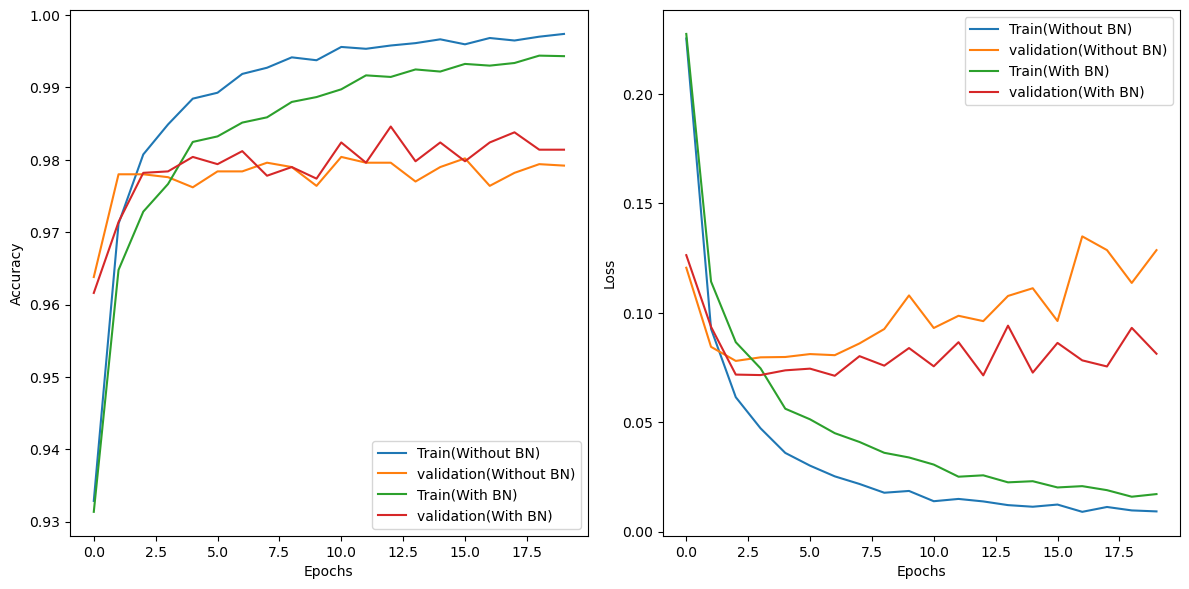

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history_without_BN.history['accuracy'],label="Train(Without BN)")
plt.plot(history_without_BN.history['val_accuracy'],label="validation(Without BN)")
plt.plot(history_with_BN.history['accuracy'],label="Train(With BN)")
plt.plot(history_with_BN.history['val_accuracy'],label="validation(With BN)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_without_BN.history['loss'],label="Train(Without BN)")
plt.plot(history_without_BN.history['val_loss'],label="validation(Without BN)")
plt.plot(history_with_BN.history['loss'],label="Train(With BN)")
plt.plot(history_with_BN.history['val_loss'],label="validation(With BN)")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

6. Discuss the impact of batch normalization on the training process and the performance of the neural network.


- Batch normalization has several positive impacts on the training process and neural network performance.
- It stabilizes and accelerates training by reducing internal covariate shift, ensures more consistent gradients, enables the use of higher learning rates, and prevents vanishing/exploding gradients. This leads to faster convergence and improved generalization, enhancing the model's performance.

In [31]:
history_with_BN.history['val_accuracy'][-1]

0.9814000129699707

#### Question 3. Experimentation and Analysis:

1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
####  with 64 batch size instead of 32

In [33]:
model_With_BN_64 = tf.keras.models.Sequential()
model_With_BN_64.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model_With_BN_64.add(Dense(200, activation="relu", name="hiddenLayer1"))
model_With_BN_64.add(BatchNormalization()) 
model_With_BN_64.add(Dense(100, activation="relu", name="hiddenLayer2"))
model_With_BN_64.add(BatchNormalization()) 
model_With_BN_64.add(Dense(10, activation="softmax", name="outputLayer"))

model_With_BN_64.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

history_with_bn = model_With_BN_64.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid), batch_size=64)

Epoch 1/20
860/860 [==============================] - 6s 5ms/step - loss: 0.2224 - accuracy: 0.9344 - val_loss: 0.1057 - val_accuracy: 0.9686
Epoch 2/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0959 - accuracy: 0.9710 - val_loss: 0.0823 - val_accuracy: 0.9748
Epoch 3/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0775 - val_accuracy: 0.9772
Epoch 4/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0940 - val_accuracy: 0.9752
Epoch 5/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0786 - val_accuracy: 0.9770
Epoch 6/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.0763 - val_accuracy: 0.9806
Epoch 7/20
860/860 [==============================] - 4s 5ms/step - loss: 0.0306 - accuracy: 0.9893 - val_loss: 0.0824 - val_accuracy: 0.9778
Epoch 

In [39]:
history_with_bn.history['val_accuracy'][-1]

0.9800000190734863

 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural network.
- Advantages: Batch normalization stabilizes training by reducing internal covariate shift, allowing higher learning rates,and accelerating convergence. It also acts as a regularizer, improving generalization.
- Limitations: It introduces extra computations during training, slightly slowing down training. 
- In some cases, it may lead to overfitting when using large batch sizes or when the dataset is small.

In [34]:
model_With_BN_200 = tf.keras.models.Sequential()
model_With_BN_200.add(Flatten(input_shape=[28, 28], name="inputLayer"))
model_With_BN_200.add(Dense(200, activation="relu", name="hiddenLayer1"))
model_With_BN_200.add(BatchNormalization()) 
model_With_BN_200.add(Dense(100, activation="relu", name="hiddenLayer2"))
model_With_BN_200.add(BatchNormalization()) 
model_With_BN_200.add(Dense(10, activation="softmax", name="outputLayer"))

model_With_BN_200.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

history_with_bn = model_With_BN_200.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid), batch_size=200)

Epoch 1/20
275/275 [==============================] - 3s 8ms/step - loss: 0.2553 - accuracy: 0.9245 - val_loss: 0.1757 - val_accuracy: 0.9608
Epoch 2/20
275/275 [==============================] - 2s 7ms/step - loss: 0.0927 - accuracy: 0.9732 - val_loss: 0.0887 - val_accuracy: 0.9730
Epoch 3/20
275/275 [==============================] - 2s 7ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.0886 - val_accuracy: 0.9730
Epoch 4/20
275/275 [==============================] - 2s 7ms/step - loss: 0.0405 - accuracy: 0.9879 - val_loss: 0.0808 - val_accuracy: 0.9756
Epoch 5/20
275/275 [==============================] - 2s 7ms/step - loss: 0.0283 - accuracy: 0.9919 - val_loss: 0.0869 - val_accuracy: 0.9748
Epoch 6/20
275/275 [==============================] - 2s 7ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0809 - val_accuracy: 0.9754
Epoch 7/20
275/275 [==============================] - 2s 6ms/step - loss: 0.0180 - accuracy: 0.9950 - val_loss: 0.0794 - val_accuracy: 0.9752
Epoch 

In [40]:
history_with_bn .history['val_accuracy'][-1]

0.9800000190734863

- Model with Batch Normalization and batch size of 32: Validation accuracy is 0.9814000129699707
- Model with Batch Normalization and batch size of 64: Validation accuracy is 0.9800000190734863
- Model with Batch Normalization and batch size of 200: Validation accuracy is 0.9800000190734863


So, as the Batch size increases Model Accuracy decreases but computational time also decreses and Model becomes fast.